# Exo Matplotlib/Seaborn avec JO-dataset

0. __Pour chaque graphique, ajouter un titre qui contient les axes/colonnes utilisé pour le graphique__ 
    - __attention:__ pour chaque graphique, il faudra appiquer une transformation sur le data pour qu'il soit adapté à la construction des graphiques demandé <br><br>

  
1. __Faire un (line-)plot qui montre:__<br>
    - le nombre uniques de sports par année
    - placer des points comme marqueurs
    - changer le style de ligne en pointillé
<br><br>

2. __Faire un graphique composé qui montre:__<br>
    - le nombre uniques de sports par année (voir 1.)
    - avec une décomposition par genre homme-femme, indiqué dans une légende
    - changer les couleurs en 'cyan' et 'magenta'
    - appliquer un 'alpha' de '0.5'
    - changer la légende de position: en bas à gauche
<br><br>
3. __Faire un bar-plot qui montre:__<br>
    - le top 10 des noms 
    - qui ont participés aux plus de sports différents, 
    - trié par: nombre de sports différents, nombre de médailles
    - changer l'orientation des labels sur l'axe-x ('xticks')
    - changer le nom de l'axe-x: 'top 10' ('xlabel')
<br><br>

4. __Faire un pie-plot qui montre les info de 'Carl Schuhmann':__<br>

    - le nombre de médailles (confondues) pour chaque sport
    - avec le type de sport pour lequel cet athlète a le plus de medailles, mis en évidence
<br><br>

5. __Faire un histogramme qui montre:__<br>
    - l'age
    - par tranche d'age de 3 années
<br><br>

6. __Faire graphique composé d' histogrammes qui montre:__ <br>
    - la taille (height)
    - par tranche de 4 cm
    - decomposé par homme-femme
    - avec un alpha = 0.6

# Reponses

### 1. Faire un (line-)plot qui montre:

    - le nombre uniques de sports par année
    - placer des points comme marqueurs
    - changer le style de ligne en pointillé 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv("jo-dataset.csv")

sports_per_year = dataset.groupby('Year')['Sport'].nunique()
sports_per_year_df = pd.DataFrame(sports_per_year)
sports_per_year_df

,Sport
Year,
1896,9
1900,20
1904,18
1906,13
1908,24
1912,17
1920,25
1924,30
1928,25


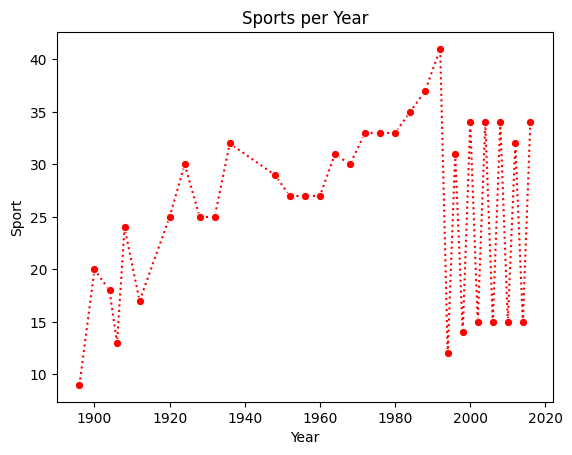

In [3]:
sns.lineplot(data=sports_per_year_df, x='Year', y='Sport', linestyle=':', marker='o', color='r')
plt.title('Sports per Year')
plt.show()

### 2. Faire un graphique composé qui montre:

    - le nombre uniques de sports par année (voir 1.)
    - avec une décomposition par genre homme-femme, indiqué dans une légende
    - changer les couleurs en 'cyan' et 'magenta'
    - appliquer un 'alpha' de '0.5'
    - changer la légende de position: en bas à gauche 

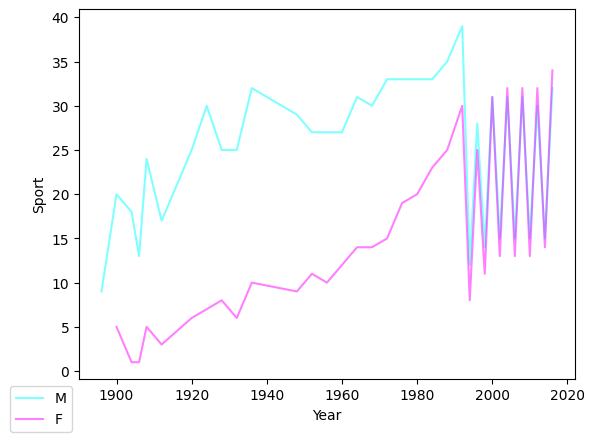

In [4]:
sports_count_per_year_per_gender = dataset.groupby(['Year', 'Sex'])['Sport'].nunique().reset_index()

sns.lineplot(data=sports_count_per_year_per_gender, x='Year', y='Sport', hue='Sex', palette=['Cyan', 'Magenta'], alpha=0.5)
plt.legend(bbox_to_anchor=(0, 0))
plt.show()

### 3. Faire un bar-plot qui montre:

    - le top 10 des noms qui ont participés aux plus de sports différents,
    - trié par: nombre de sports différents, nombre de médailles
    - changer l'orientation des labels sur l'axe-x ('xticks')
    - changer le nom de l'axe-x: 'top 10' ('xlabel')

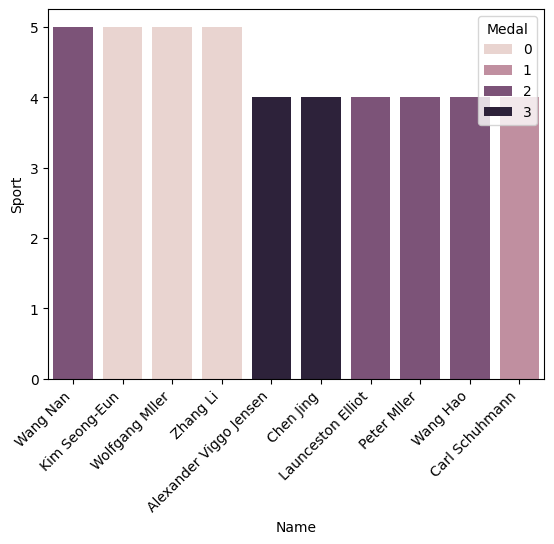

In [46]:
most_different_sports = dataset.groupby(dataset['Name'])[['Sport', 'Medal']].nunique().reset_index()
top_10_athletes = most_different_sports.sort_values(by=['Sport', 'Medal'], ascending=False).head(10)
top_10_athletes

sns.barplot(data=top_10_athletes, x='Name', y='Sport', hue='Medal')
plt.xticks(rotation=45, ha='right')
plt.show()

### Faire un pie-plot qui montre les info de 'Carl Schuhmann':

    - le nombre de médailles (confondues) pour chaque sport
    - avec le type de sport pour lequel cet athlète a le plus de medailles, mis en évidence



### Skip car Pie plot n'existe pas en Seaborn

### Faire un histogramme qui montre:

    - l'age
    - par tranche d'age de 3 années 
    - combien il y'a de personnes par tranches (chaque tranche de 3 ans correspond a 1 barre d'histogramme)

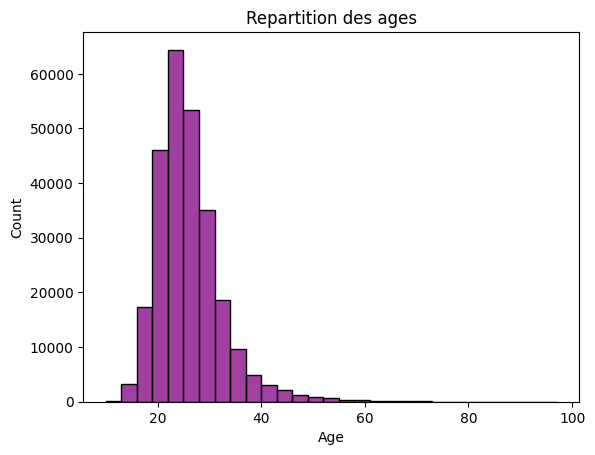

In [75]:
age_count = dataset['Age'].dropna()

bins = range(int(age_count.min()), int(age_count.max()) + 3, 3)
sns.histplot(age_count, bins=bins, color='Purple')
plt.title('Repartition des ages')
plt.show()

### Faire graphique composé d' histogrammes qui montre:

    - la taille (height)
    - par tranche de 4 cm
    - decomposé par homme-femme
    - avec un alpha = 0.6



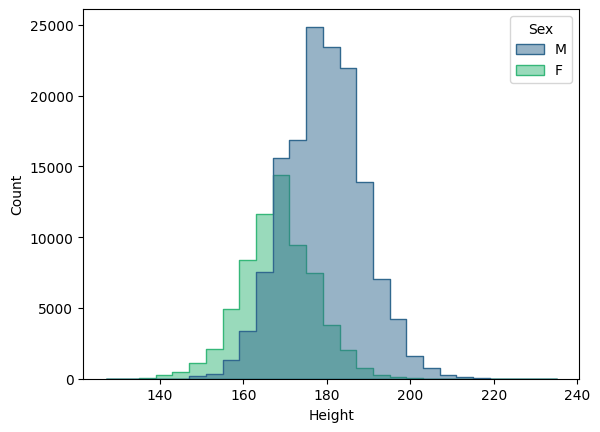

In [104]:
heights = dataset['Height'].dropna()

bins = range(int(heights.min()), int(heights.max() + 10), 4)
sns.histplot(dataset, x='Height', bins=bins, hue='Sex', element='step', palette='viridis', alpha=0.5)
plt.show()